<hr style="border: solid 3px orange;">

# <center><span style="font-family:Arial; font-style: italic; color:orange ">Sentiment Analysis  in Arabic tweets.</span></center>

<div class="alert alert-block alert-info">  
    
<h1><strong>Introduction</strong></h1>
    <p>In this kernel, we are going to analyse the Arabic langauge based tweets for the sentiment analysis. There are two types of sentiments which are positive and negative. The data contains the positive tweet text and negative tweet text for the binary classification. There are `22761` records/tweets are labeled as positive and `22514` are negative tweets.</p>
    <br>
        <hr>
      <b>`Problem description`: </b> 
    <hr>
<ul>
    <li>To build a robust system to classify the sentiments in arabic text based tweets using machine learning.</li>
</ul>


<hr>
<b>Evolution measures: </b> 
<hr>
<ul>
<p> After training the model, we will apply the evaluation measures to check that how the model is getting predictions. We will use the following evaluation measures to evaluate the performance of the model:</p>
    <li>Accuracy</li>
    <li>Precision</li>
     <li>Recall</li>
     <li>F1 Measure</li>
</ul>
<hr>
<b>Technical Approach</b>
<hr>
<p>We are using python language in the implementations and Jupyter Notebook that support the machine learning and data science projects. After training on the model, we will evaluate the model to check the performance of trained model and will select the final model for classification of arabic tweet sentiments</p>
 <hr>

<b>Source of Data: </b> 
<hr> 
 <a href="https://www.kaggle.com/datasets/mksaad/arabic-sentiment-twitter-corpus">https://www.kaggle.com/datasets/mksaad/arabic-sentiment-twitter-corpus</a>
   
</div>

![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)

<h1 style="background-color:orange;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

<div style="font-family: Calibri, serif; text-align: left;">
    <hr style="border: none;
               border-top: 2px solid #041445;
               width: 100%;
               margin-top: 30px;
               margin-bottom: 20px;
               margin-left: 0;">
   
</div>
<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b> | Table of Content</b></p>
</div>

* [Importing libraries 📕](#p1)<br><br>
* [ Read & Load the Data  📁](#p2)<br><br>
* [View and check Data Analysis 🔎 📊 ](#p3)<br><br>
* [  Data Preprocessing 📝](#p5)<br><br>
* [Splitting Data Into Train & Test Subsets](#p6)<br><br>
* [ Model Building and run](#p7)
    * [Naive Bayes Algorithm](#7.1)
    * [LogisticRegression Algorithm](#7.2)
    * [SVC Algorithm](#7.3)
    * [MLPClassifier](#7.4)
    * [RandomForestClassifier](#7.5)
    * [AdaBoostClassifier](#7.6)<br><br>
* [Data Visualization](#p8)<br><br>
* [ Flask App To Serve Our Models](#p9)

<div style="font-family: Calibri, serif; text-align: left;">
    <hr style="border: none;
               border-top: 2px solid #041445;
               width: 100%;
               margin-top: 30px;
               margin-bottom: 20px;
               margin-left: 0;">
   
</div>

<a name="p1"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraires 📕</h1>


<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b> | Importing packages</b></p>
</div>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import sklearn 
import random
import nltk
import re
import os
os.chdir('C:/Users/User/Desktop/data')

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

<a name="p2"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Read & Load the Data 📁</h1>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b> | Load datasets</b></p>
</div>

In [2]:
column_names = ["Label", "tweets"]
pos_training = pd.read_table("train_pos.tsv", names=column_names)
neg_training  = pd.read_table("train_neg.tsv", names=column_names)
pos_testing   = pd.read_table("test_pos.tsv", names=column_names)
neg_testing   = pd.read_table("test_neg.tsv", names=column_names)

In [3]:
train_data = pd.concat([pos_training,neg_training])
test_data = pd.concat([pos_testing,neg_testing])

Dataset's dataframe has two columns:
1) **tweet**: tweet text 

2) **label**: representing sentiment,positive and negative

<a name="p3"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> View and check Data Analysis 🔎 📊</h1>

In [4]:
test_data.head(10)

Label                                             tweets
0   pos  #الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1   pos                               صباحك خيرات ومسرات 🌸
2   pos  #تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3   pos  😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4   pos  رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...
5   pos  اجيال القووه والصمود والتحدي اجيال المستقبل وا...
6   pos  البنت اذا شافت امها معصبة تقوم ترتب البيت لا ا...
7   pos                       جدا الصراحه بس المغرب قدها 💪
8   pos                                    صباح الياسمين 🍃
9   pos  لسنا مجبرين على تبرير المواقف لمن يسيء الظن بن...

In [5]:
test_data.tail()

Label                                             tweets
5763   neg  النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
5764   neg  استشهاد_الامام_كاظم_الغيظ السلام على المعذب في...
5765   neg                          انا كنت اكل الصحن بكبره 😐
5766   neg  قولوا لي ايش تشوفوا .. مع ملاحظة التلطف لأنه ا...
5767   neg  ✍ إذا أردت أن تعرف شيئا عني إسالني قبل أن تسأل...

In [6]:
train_data.head(10)

Label                                             tweets
0   pos  نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1   pos  وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2   pos                                    من الخير نفسه 💛
3   pos  #زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4   pos  الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
5   pos  #الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...
6   pos                      احبك انت وياه واموري من سعه 🎶
7   pos  #تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
8   pos  وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...
9   pos  اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...

In [7]:
train_data.tail()

Label                                             tweets
22509   neg  كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22510   neg                                  احسدك على الايم 💔
22511   neg                            لأول مرة ما بنكون سوا 💔
22512   neg                                 بقله ليش يا واطي 🤔
22513   neg  قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...

In [8]:
print("Columns :")
print(train_data.columns)

Columns :
Index(['Label', 'tweets'], dtype='object')


In [9]:
print("Columns :")
print(test_data.columns)

Columns :
Index(['Label', 'tweets'], dtype='object')


In [10]:
print(len(train_data))

45275


In [11]:
print(len(test_data))

11520


In [12]:
train= train_data[["Label"]]
train.value_counts()

Label
pos      22761
neg      22514
Name: count, dtype: int64

In [13]:
train= test_data[["Label"]]
train.value_counts()

Label
neg      5768
pos      5752
Name: count, dtype: int64

# Getting tweet text

In [14]:
def highlight_col(x, df):
    mask =  df['Label'] == 'pos'
    mask2 = df['Label'] == 'neg'
    x = pd.DataFrame('', index=df.index, columns=df.columns)
    x.loc[mask] = 'background-color: #e6ffe6'
    x.loc[mask2] = 'background-color: #ffe6e6'
    return x  

train_data=train_data.sample(frac=1,random_state=42).reset_index(drop=True)
df_tmp = train_data.sample(5)
df_tmp.style.apply(lambda x: highlight_col(x, df_tmp), axis=None)

In [15]:
n=np.random.randint(0,train_data.shape[0]-1)
train_data.tweets.values[n]

'لعب فينا البعوض 😤'

In [16]:
from IPython.display import display
def highlight_col(x, df):
    mask =  df['Label'] == 'pos'
    mask2 = df['Label'] == 'neg'
    x = pd.DataFrame('', index=df.index, columns=df.columns)
    x.loc[mask] = 'background-color: #e6ffe6'
    x.loc[mask2] = 'background-color: #ffe6e6'
    return x  

test_data=test_data.sample(frac=1,random_state=42).reset_index(drop=True)
df_tmp = test_data.sample(5)
df_tmp.style.apply(lambda x: highlight_col(x, df_tmp), axis=None)

In [17]:
n=np.random.randint(0,test_data.shape[0]-1)
test_data.tweets.values[n]

'احلى خلفي سعودي شكله ماخذها من الجامعة: سحاقيات اثاره جنس مكوة اغتصاب 😬 إبريل :27:08 مساء'

In [18]:
train_data.isna().sum()

Label     0
tweets    0
dtype: int64

In [19]:
test_data.isna().sum()

Label     0
tweets    0
dtype: int64

In [20]:
np.sum(train_data.isnull().any(axis=1))

0

In [21]:
np.sum(test_data.isnull().any(axis=1))

0

In [22]:
print("\nDataset Information:")
print(train_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45275 entries, 0 to 45274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   45275 non-null  object
 1   tweets  45275 non-null  object
dtypes: object(2)
memory usage: 707.6+ KB
None


In [23]:
print("\nDataset Information:")
print(test_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   11520 non-null  object
 1   tweets  11520 non-null  object
dtypes: object(2)
memory usage: 180.1+ KB
None


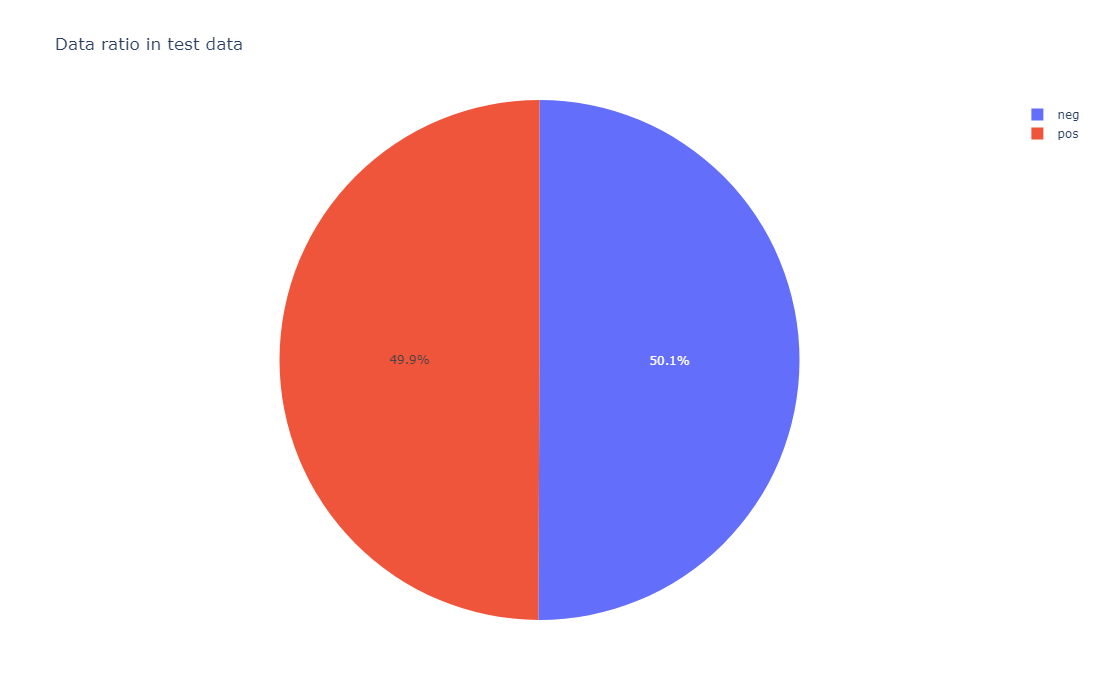

In [24]:
import plotly.express as px
data_counts = test_data["Label"].value_counts().head(3)
temp = pd.DataFrame({
    'count': data_counts.values,
    'Label': data_counts.index
})
fig = px.pie(temp, values='count', names='Label', title='Data ratio in test data',
             color='Label', width=700, height=700)
fig.show()


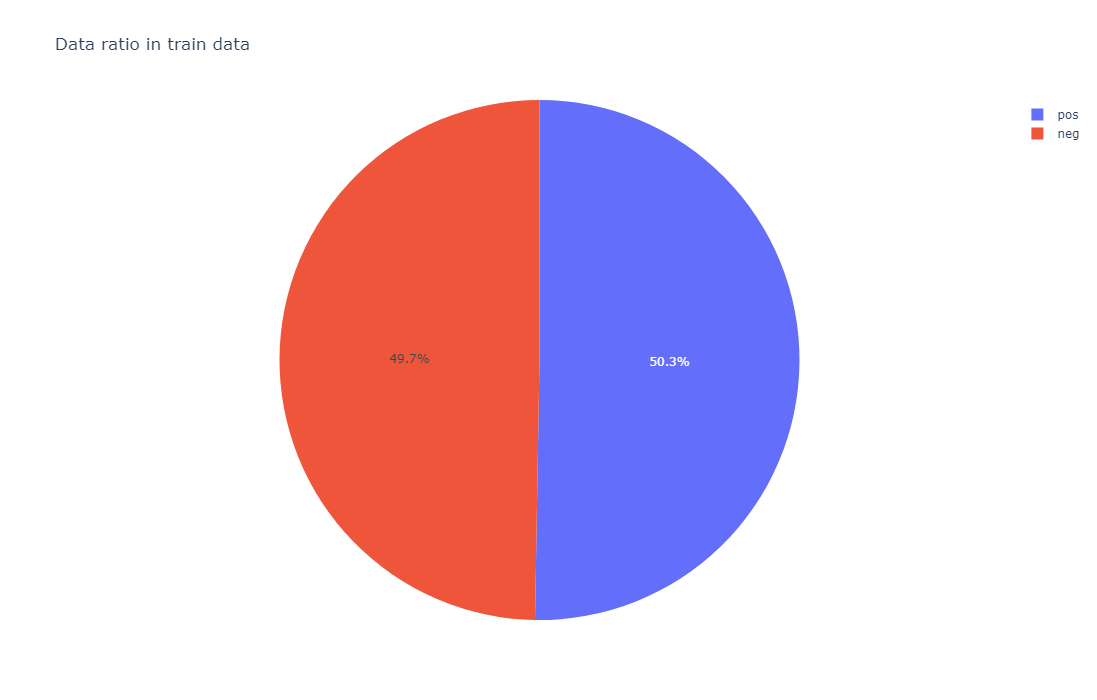

In [25]:
data_counts = train_data["Label"].value_counts().head(3)
temp = pd.DataFrame({
    'count': data_counts.values,
    'Label': data_counts.index
})
fig = px.pie(temp, values='count', names='Label', title='Data ratio in train data',
             color='Label', width=700, height=700)
fig.show()



<a name="p5"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Preprocessing and Data Cleaning  📝 </h1>

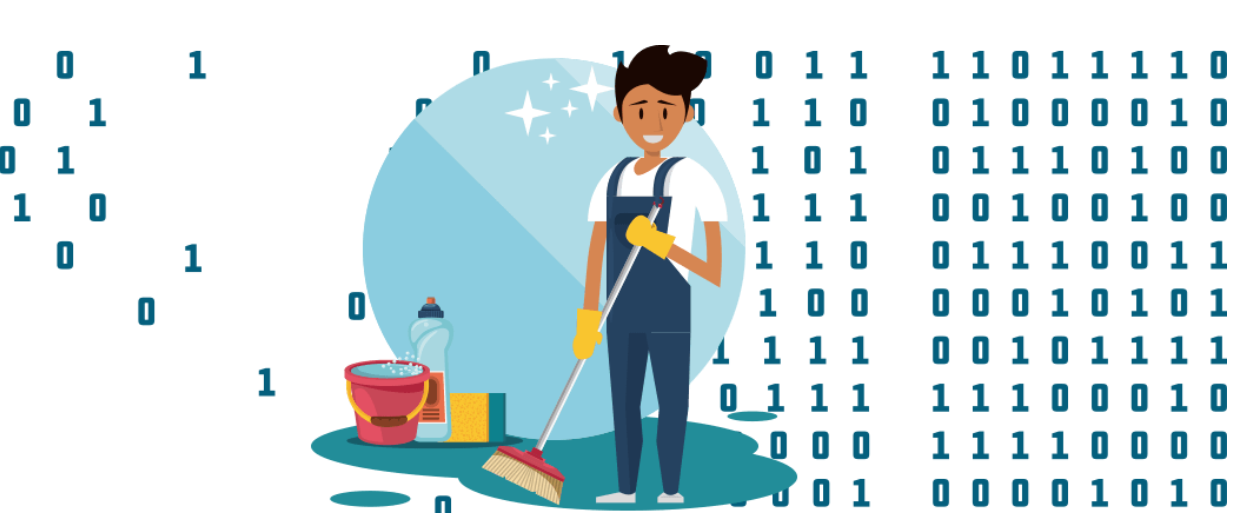

<div class="alert alert-block alert-info">  
<li>Remove URLs</li>
<li>Remove special characters and numbers</li>
<li>Remove emojis and non-word characters</li>
<li>Remove Twitter handles</li>  
<li>Remove hashtags</li>  
<li>Remove single characters</li>  
<li>Remove stopwords</li>  
</div>

In [26]:
import nltk
from nltk.corpus import stopwords

In [27]:
def preprocess_arabic_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^ء-ي\s]', ' ', text)  # Adjust the range based on your specific needs
    # Remove emojis and non-word characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove Twitter handles
    text = re.sub(r'@[^\s]+', '', text)
    # Remove hashtags
    text = re.sub(r'\B#\S+', '', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', '', text)
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Tokenization
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('arabic'))
    words = [word for word in words if word not in stop_words]
    # Join the words back into a string
    processed_text = ' '.join(words)
    return processed_text

In [28]:
train_data["processed_text"] = train_data["tweets"].apply(preprocess_arabic_text)

In [29]:
train_data

Label                                             tweets  \
0       pos              مقال يدور حول الحمى يوشك ان يقع فيه 😊   
1       pos                                     تيشرت القائد 💙   
2       neg  وكل السعوديه بدو ..حتى الحاضره منهم من اصل بدو...   
3       neg                     المونافري طلع برهوش .. سدينا 😤   
4       neg                               منو خر بيتهم مثلنا 😩   
...     ...                                                ...   
45270   pos  يلامسون قلبي أولئك الذين ينتبهون لتفاصيلي الصغ...   
45271   neg  #الهلال_الاهلي #حسين_عبدالغني سبق وان تكررت له...   
45272   neg  تلاتين سنة بترقص .. الليلة رقصتنا أنا ببكي 😭 د...   
45273   pos  بحياتك يا ولدى امرأة 👰 عيناها سبحان المعبود 👀 ...   
45274   pos  بس احبها :(( شخصيتها تجنن هي حلاوة الفلم نفس م...   

                                          processed_text  
0                        مقال يدور حول الحمى يوشك ان يقع  
1                                           تيشرت القائد  
2      وكل السعوديه بدو الحاضره منهم اصل بدوي انا قصد...  
3                              المونافري طلع برهوش سدينا  
4                                     منو خر بيتهم مثلنا  
...                                                  ...  
45270  يلامسون قلبي ينتبهون لتفاصيلي الصغيرة أنتبه نف...  
45271  الهلال الاهلي حسين عبدالغني سبق وان تكررت لحال...  
45272  تلاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة ش...  
45273  بحياتك ولدى امرأة عيناها المعبود فمها مرسوم كا...  
45274   احبها شخصيتها تجنن حلاوة الفلم انتي حلاوة الدنيا  

[45275 rows x 3 columns]

In [30]:
test_data["processed_text"] = test_data["tweets"].apply(preprocess_arabic_text)

In [31]:
train_data

Label                                             tweets  \
0       pos              مقال يدور حول الحمى يوشك ان يقع فيه 😊   
1       pos                                     تيشرت القائد 💙   
2       neg  وكل السعوديه بدو ..حتى الحاضره منهم من اصل بدو...   
3       neg                     المونافري طلع برهوش .. سدينا 😤   
4       neg                               منو خر بيتهم مثلنا 😩   
...     ...                                                ...   
45270   pos  يلامسون قلبي أولئك الذين ينتبهون لتفاصيلي الصغ...   
45271   neg  #الهلال_الاهلي #حسين_عبدالغني سبق وان تكررت له...   
45272   neg  تلاتين سنة بترقص .. الليلة رقصتنا أنا ببكي 😭 د...   
45273   pos  بحياتك يا ولدى امرأة 👰 عيناها سبحان المعبود 👀 ...   
45274   pos  بس احبها :(( شخصيتها تجنن هي حلاوة الفلم نفس م...   

                                          processed_text  
0                        مقال يدور حول الحمى يوشك ان يقع  
1                                           تيشرت القائد  
2      وكل السعوديه بدو الحاضره منهم اصل بدوي انا قصد...  
3                              المونافري طلع برهوش سدينا  
4                                     منو خر بيتهم مثلنا  
...                                                  ...  
45270  يلامسون قلبي ينتبهون لتفاصيلي الصغيرة أنتبه نف...  
45271  الهلال الاهلي حسين عبدالغني سبق وان تكررت لحال...  
45272  تلاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة ش...  
45273  بحياتك ولدى امرأة عيناها المعبود فمها مرسوم كا...  
45274   احبها شخصيتها تجنن حلاوة الفلم انتي حلاوة الدنيا  

[45275 rows x 3 columns]

In [32]:
test_data

Label                                             tweets  \
0       pos  #مسابقة والجائزة 💰 / من أول من فتق لسانه بالعر...   
1       neg  ❥↓🌿🍥 ما لأبن أدم والفخر اوله نطفه وأخره جيفه و...   
2       pos  ✨ لاتحزن ودع القلق,يستجيب لك الكريم هو يأخرها ...   
3       neg  بيي الله يستر طلعتي من الدوام سيارتي وايد نازل...   
4       neg  تلاتين سنة بترقص .. الليلة رقصتنا أنا ببكي 😭 د...   
...     ...                                                ...   
11515   neg                           . . بعد أن ذبلت القلوب 😔   
11516   pos                           انا عني و دي ازود رابع 😀   
11517   pos  *عشائيات* *صلاةالمغرب*سورة الحاقة[١٣-٣٧] 📽*مرئ...   
11518   pos  وإليك حن الجذع و هو كصخرة أفلا يحن القلب ، وهو...   
11519   neg  📌 فيفا تركت الاتحادات والبطولات القارية وتركت ...   

                                          processed_text  
0      مسابقة والجائزة فتق لسانه بالعربية الجواب داخل...  
1      لأبن أدم والفخر اوله نطفه وأخره جيفه يرزق نفسه...  
2      لاتحزن ودع القلق يستجيب الكريم يأخرها لوقتها ا...  
3      بيي الله يستر طلعتي الدوام سيارتي وايد نازله ع...  
4      تلاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة ش...  
...                                                  ...  
11515                                        ذبلت القلوب  
11516                                    انا عني دي ازود  
11517           عشائيات صلاةالمغرب سورة الحاقة مرئي صوتي  
11518           وإليك حن الجذع كصخرة أفلا يحن القلب رقيق  
11519  فيفا تركت الاتحادات والبطولات القارية وتركت ال...  

[11520 rows x 3 columns]

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>| Tokenizer</b></p>
</div>

In [33]:
from nltk.tokenize import RegexpTokenizer

In [34]:
tokenizer = RegexpTokenizer(r'\w+')
train_data["tweets"] = train_data["tweets"].apply(tokenizer.tokenize)

In [35]:
train_data["tweets"].sample(10)

12007    [متراهن, مع, رأفت, ع, عزومه, ع, اي, حاجه, ممكن...
43282    [هه, والنص, الثاني, بسولف, ياعمي, نحنا, غير, م...
22162    [الهلال_الاهلي, ابد, حسين, لم, يخطي, ولم, يسيء...
8533                                [love, أحبك, يا, قلبي]
9209                                           [لا, هلالي]
6354                                [خطوة, ونخلص, الموضوع]
43119       [ريتويت, لو, أخلاقك, بتسمح, ليك, تسلم, البشير]
40214                                        [صباح, الخير]
13816    [والأم, من, بعد, الله, ملاذ, لكن, رقه, لا, ملا...
9143     [يا, اخوانا, و, الله, لسة, مطالبنا, ما, أتحقق,...
Name: tweets, dtype: object

In [36]:
#Tweet text information
all_words = [word for tokens in train_data["tweets"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in train_data["tweets"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

529081 words total, with a vocabulary size of 71096
Max sentence length is 1349



<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>| wordcloud </b></p>
</div>

In [37]:
from collections import Counter 
counter = Counter(all_words)
counter.most_common(25)

[('من', 10412),
 ('في', 7568),
 ('الله', 6782),
 ('و', 5604),
 ('على', 5109),
 ('لا', 4029),
 ('ما', 3733),
 ('كل', 2784),
 ('يا', 2763),
 ('اللهم', 2499),
 ('ولا', 2106),
 ('صباح', 2096),
 ('بس', 1966),
 ('أن', 1678),
 ('والله', 1644),
 ('اللي', 1609),
 ('انا', 1575),
 ('الهلال', 1520),
 ('عن', 1481),
 ('بعد', 1457),
 ('هذا', 1436),
 ('مع', 1429),
 ('ان', 1359),
 ('الخير', 1272),
 ('هو', 1212)]

In [38]:
counted_words = Counter(all_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

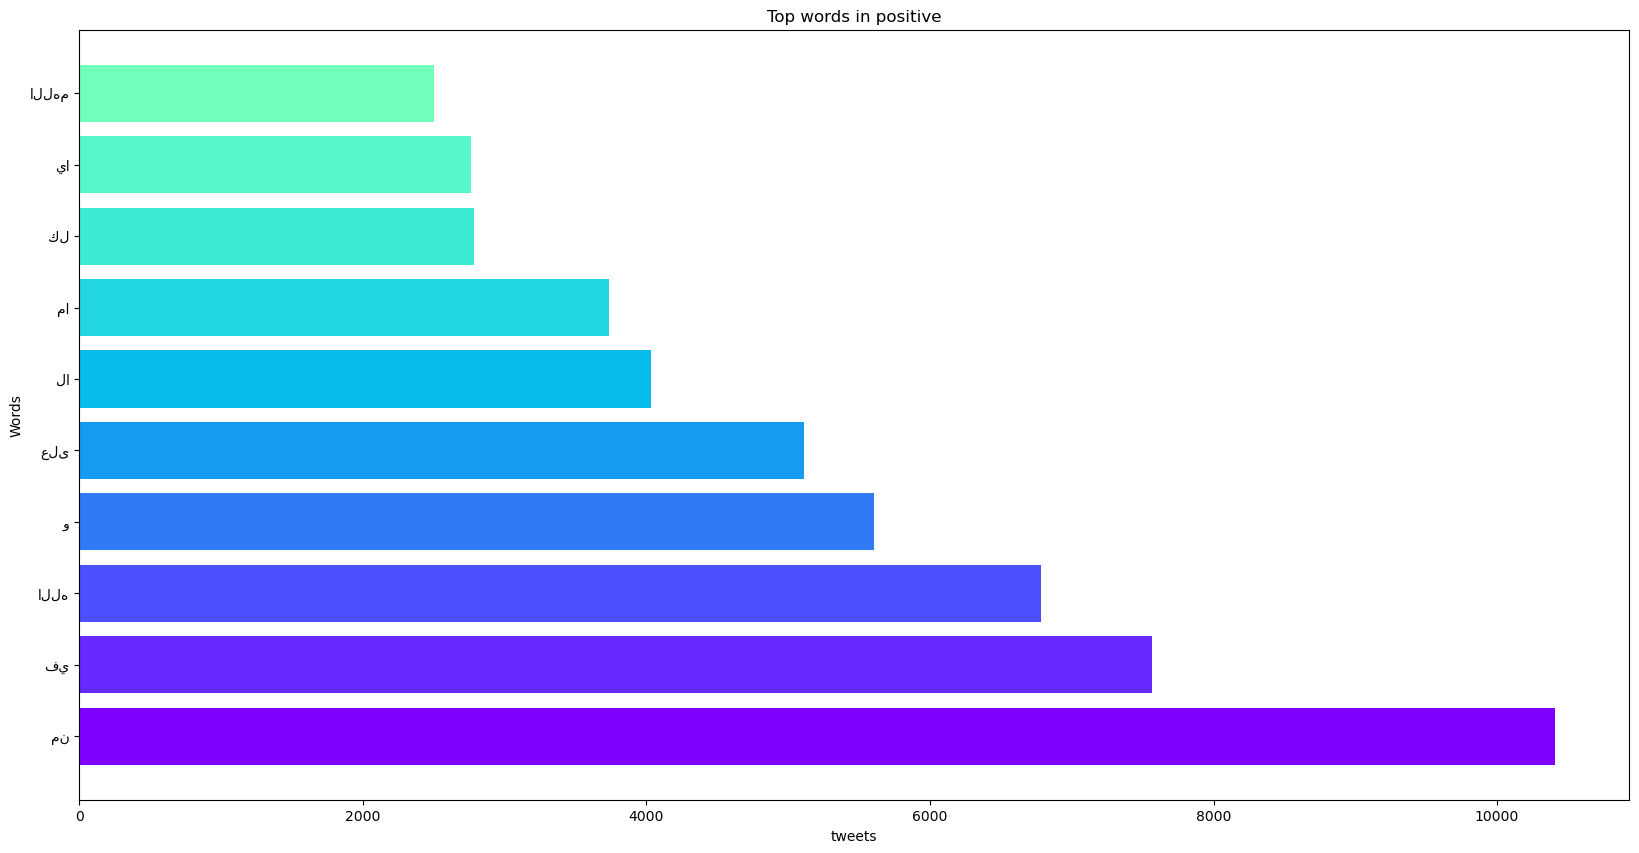

In [39]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 20))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in positive')
plt.xlabel('tweets')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)


<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>| Extracting Root </b></p>
</div>

### 1.Stemming
So for now we will just stick with ntlk's `ISRIStemmer` and `ARLSTem`

In [40]:
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()

from nltk.stem.arlstem import ARLSTem
stemmer = ARLSTem()

def stem(text):
    stemmed = []
    for word in text:
        stemmed.append(stemmer.stem(word))
    return stemmed

def stem_untokenized(text):
    return stemmer.stem(text)

stemming our text into the column `root_extracted`, we go from the already tokenized text into producing the stemmer/lemmetized text.

In [41]:
from tqdm import tqdm
tqdm.pandas()

## TESTING WITH UNTOKENIZED TEXT
train_data['root_extracted'] = train_data.processed_text.progress_apply(stem_untokenized)
display(train_data)

test_data['root_extracted'] = test_data.processed_text.progress_apply(stem_untokenized)
display(test_data)

100%|█████████████████████████████████████████████████████████████████████████| 45275/45275 [00:00<00:00, 90961.66it/s]


Label                                             tweets  \
0       pos       [مقال, يدور, حول, الحمى, يوشك, ان, يقع, فيه]   
1       pos                                    [تيشرت, القائد]   
2       neg  [وكل, السعوديه, بدو, حتى, الحاضره, منهم, من, ا...   
3       neg                     [المونافري, طلع, برهوش, سدينا]   
4       neg                            [منو, خر, بيتهم, مثلنا]   
...     ...                                                ...   
45270   pos  [يلامسون, قلبي, أولئك, الذين, ينتبهون, لتفاصيل...   
45271   neg  [الهلال_الاهلي, حسين_عبدالغني, سبق, وان, تكررت...   
45272   neg  [تلاتين, سنة, بترقص, الليلة, رقصتنا, أنا, ببكي...   
45273   pos  [بحياتك, يا, ولدى, امرأة, عيناها, سبحان, المعب...   
45274   pos  [بس, احبها, شخصيتها, تجنن, هي, حلاوة, الفلم, ن...   

                                          processed_text  \
0                        مقال يدور حول الحمى يوشك ان يقع   
1                                           تيشرت القائد   
2      وكل السعوديه بدو الحاضره منهم اصل بدوي انا قصد...   
3                              المونافري طلع برهوش سدينا   
4                                     منو خر بيتهم مثلنا   
...                                                  ...   
45270  يلامسون قلبي ينتبهون لتفاصيلي الصغيرة أنتبه نف...   
45271  الهلال الاهلي حسين عبدالغني سبق وان تكررت لحال...   
45272  تلاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة ش...   
45273  بحياتك ولدى امرأة عيناها المعبود فمها مرسوم كا...   
45274   احبها شخصيتها تجنن حلاوة الفلم انتي حلاوة الدنيا   

                                          root_extracted  
0                        مقال يدور حول الحمي يوشك ان يقع  
1                                            يشرت القائد  
2      كل السعوديه بدو الحاضره منهم اصل بدوي انا قصدي...  
3                                  مونافري طلع برهوش سدي  
4                                       منو خر بيتهم مثل  
...                                                  ...  
45270  يلامسون قلبي ينتبهون لتفاصيلي الصغيرة انتبه نف...  
45271  هلال الاهلي حسين عبدالغني سبق وان تكررت لحالات...  
45272  لاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة شد...  
45273  بحياتك ولدي امراة عيناها المعبود فمها مرسوم كا...  
45274     حبها شخصيتها تجنن حلاوة الفلم انتي حلاوة الدني  

[45275 rows x 4 columns]

100%|████████████████████████████████████████████████████████████████████████| 11520/11520 [00:00<00:00, 106413.86it/s]


Label                                             tweets  \
0       pos  #مسابقة والجائزة 💰 / من أول من فتق لسانه بالعر...   
1       neg  ❥↓🌿🍥 ما لأبن أدم والفخر اوله نطفه وأخره جيفه و...   
2       pos  ✨ لاتحزن ودع القلق,يستجيب لك الكريم هو يأخرها ...   
3       neg  بيي الله يستر طلعتي من الدوام سيارتي وايد نازل...   
4       neg  تلاتين سنة بترقص .. الليلة رقصتنا أنا ببكي 😭 د...   
...     ...                                                ...   
11515   neg                           . . بعد أن ذبلت القلوب 😔   
11516   pos                           انا عني و دي ازود رابع 😀   
11517   pos  *عشائيات* *صلاةالمغرب*سورة الحاقة[١٣-٣٧] 📽*مرئ...   
11518   pos  وإليك حن الجذع و هو كصخرة أفلا يحن القلب ، وهو...   
11519   neg  📌 فيفا تركت الاتحادات والبطولات القارية وتركت ...   

                                          processed_text  \
0      مسابقة والجائزة فتق لسانه بالعربية الجواب داخل...   
1      لأبن أدم والفخر اوله نطفه وأخره جيفه يرزق نفسه...   
2      لاتحزن ودع القلق يستجيب الكريم يأخرها لوقتها ا...   
3      بيي الله يستر طلعتي الدوام سيارتي وايد نازله ع...   
4      تلاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة ش...   
...                                                  ...   
11515                                        ذبلت القلوب   
11516                                    انا عني دي ازود   
11517           عشائيات صلاةالمغرب سورة الحاقة مرئي صوتي   
11518           وإليك حن الجذع كصخرة أفلا يحن القلب رقيق   
11519  فيفا تركت الاتحادات والبطولات القارية وتركت ال...   

                                          root_extracted  
0      مسابقة والجائزة فتق لسانه بالعربية الجواب داخل...  
1      لابن ادم والفخر اوله نطفه واخره جيفه يرزق نفسه...  
2      لاتحزن ودع القلق يستجيب الكريم ياخرها لوقتها ا...  
3      بيي الله يستر طلعتي الدوام سيارتي وايد نازله ع...  
4      لاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة شد...  
...                                                  ...  
11515                                        ذبلت القلوب  
11516                                     ان عني دي ازود  
11517           عشائيات صلاةالمغرب سورة الحاقة مرئي صوتي  
11518              يك حن الجذع كصخرة افلا يحن القلب رقيق  
11519  فيفا تركت الاتحادات والبطولات القارية وتركت ال...  

[11520 rows x 4 columns]

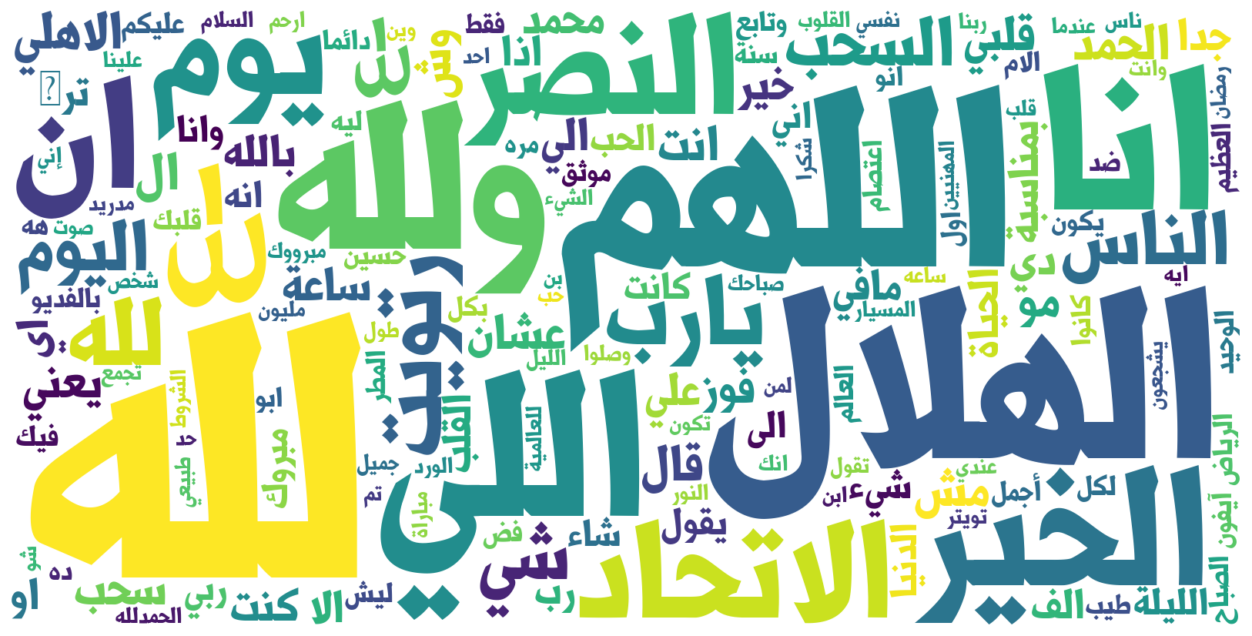

In [42]:
# display the most frequent words
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from itertools import islice
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(line for line in train_data['processed_text'])
stop_ar = stopwords.words('arabic') 
top_words = {}
words = text.split()
for w in words:
    if w in stop_ar:
        continue
    else:
        if w not in top_words:
            top_words[w] = 1
        else:
            top_words[w] +=1

# Sort the dictionary of the most frequent words
top_words = {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse = True)}

# select the first 150 most frequent words
def take(n, iterable):
    return list(islice(iterable, n))
for_wc = take(150, top_words.items())

# you need to reshape your words to be shown properly and turn the result into a dictionary
dic_data = {}
for t in for_wc:
    r = arabic_reshaper.reshape(t[0]) # connect Arabic letters
    bdt = get_display(r) # right to left
    dic_data[bdt] = t[1] 

# Plot
wc = WordCloud(background_color="white", width=1600, height=800,max_words=400 ,
font_path='C:/Users/User/AppData/Local/Microsoft/Windows/Fonts/Shoroq-Font.ttf').generate_from_frequencies(dic_data)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>|encoding Label as 1 for Postive class and 0 for negative class</b></p>
</div>

In [43]:
# 0 = neg and 1 = pos
label_mapping = {"pos": 1, "neg":0}
train_data['Label'] =train_data['Label'].map(label_mapping)
train_data.head()

Label                                             tweets  \
0      1       [مقال, يدور, حول, الحمى, يوشك, ان, يقع, فيه]   
1      1                                    [تيشرت, القائد]   
2      0  [وكل, السعوديه, بدو, حتى, الحاضره, منهم, من, ا...   
3      0                     [المونافري, طلع, برهوش, سدينا]   
4      0                            [منو, خر, بيتهم, مثلنا]   

                                      processed_text  \
0                    مقال يدور حول الحمى يوشك ان يقع   
1                                       تيشرت القائد   
2  وكل السعوديه بدو الحاضره منهم اصل بدوي انا قصد...   
3                          المونافري طلع برهوش سدينا   
4                                 منو خر بيتهم مثلنا   

                                      root_extracted  
0                    مقال يدور حول الحمي يوشك ان يقع  
1                                        يشرت القائد  
2  كل السعوديه بدو الحاضره منهم اصل بدوي انا قصدي...  
3                              مونافري طلع برهوش سدي  
4                                   منو خر بيتهم مثل

In [44]:
# 0 = neg and 1 = pos
label_mapping = {"pos": 1, "neg":0}
test_data['Label'] =test_data['Label'].map(label_mapping)
test_data.head()

Label                                             tweets  \
0      1  #مسابقة والجائزة 💰 / من أول من فتق لسانه بالعر...   
1      0  ❥↓🌿🍥 ما لأبن أدم والفخر اوله نطفه وأخره جيفه و...   
2      1  ✨ لاتحزن ودع القلق,يستجيب لك الكريم هو يأخرها ...   
3      0  بيي الله يستر طلعتي من الدوام سيارتي وايد نازل...   
4      0  تلاتين سنة بترقص .. الليلة رقصتنا أنا ببكي 😭 د...   

                                      processed_text  \
0  مسابقة والجائزة فتق لسانه بالعربية الجواب داخل...   
1  لأبن أدم والفخر اوله نطفه وأخره جيفه يرزق نفسه...   
2  لاتحزن ودع القلق يستجيب الكريم يأخرها لوقتها ا...   
3  بيي الله يستر طلعتي الدوام سيارتي وايد نازله ع...   
4  تلاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة ش...   

                                      root_extracted  
0  مسابقة والجائزة فتق لسانه بالعربية الجواب داخل...  
1  لابن ادم والفخر اوله نطفه واخره جيفه يرزق نفسه...  
2  لاتحزن ودع القلق يستجيب الكريم ياخرها لوقتها ا...  
3  بيي الله يستر طلعتي الدوام سيارتي وايد نازله ع...  
4  لاتين سنة بترقص الليلة رقصتنا ببكي دي حلاوة شد...

<a name="p6"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;"> Splitting Data Into Train & Test Subsets. </h1>

In [45]:
data = pd.concat([train_data ,test_data])

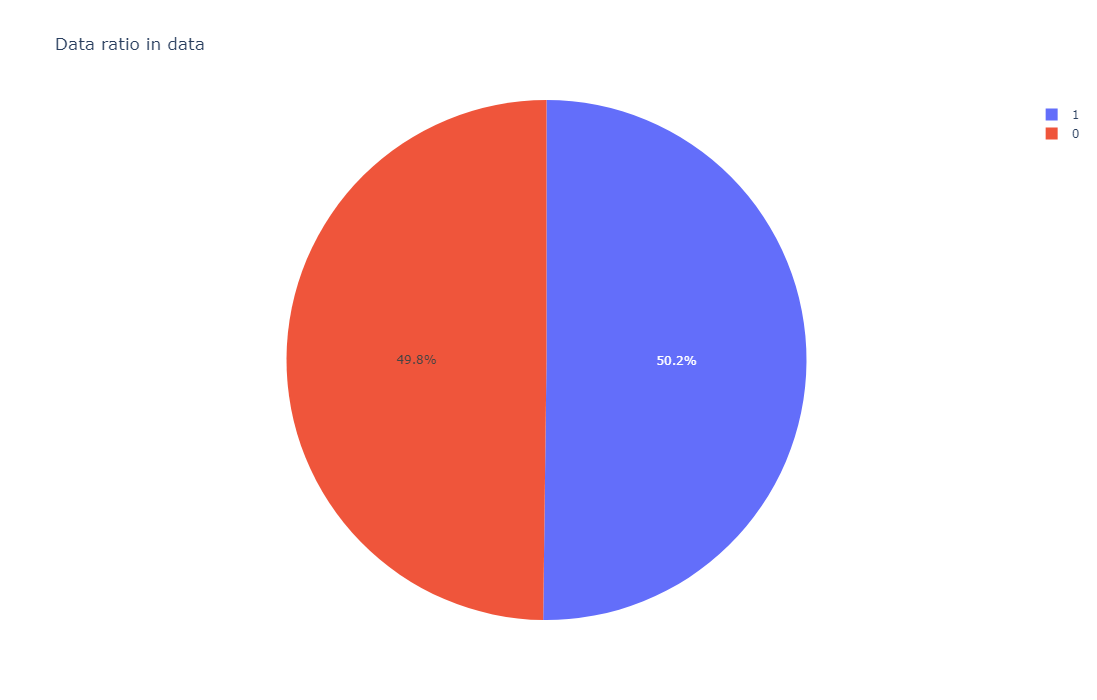

In [46]:
import plotly.express as px
data_counts = data["Label"].value_counts().head(3)
temp = pd.DataFrame({
    'count': data_counts.values,
    'Label': data_counts.index
})
fig = px.pie(temp, values='count', names='Label', title='Data ratio in data',
             color='Label', width=700, height=700)
fig.show()


In [47]:
def random_split(data, features, output, fraction, seed=0):
    X_train, X_test, y_train, y_test = train_test_split(data[features],
                                                        data[output],
                                                        stratify = data[output],
                                                        random_state=seed,
                                                        train_size=fraction
                                                       )
    train_data = pd.DataFrame(data=X_train, columns=features)
    train_data[output] = y_train
    test_data = pd.DataFrame(data=X_test, columns=features)
    test_data[output] = y_test
    
    return train_data, test_data

In [48]:
from sklearn.model_selection import train_test_split

# Define the random seed value
rand_seed = 42  # You can use any integer value
train_fraction = 0.80  # use this to split data into training (80%), and tmp (20%)
val_fraction = 0.50    # use this to split the tmp data into validation (50%), and testing (50%)

output = 'Label'  # output label column
features = data.columns.tolist()  # the feature columns

# Check if the output column is in the feature columns before attempting to remove it
if output in features:
    features.remove(output)
    print('output:', output)
    print('features:', features)

    train_data, tmp = random_split(data, features, output, train_fraction, rand_seed)
    val_data, test_data = random_split(tmp, features, output, val_fraction, rand_seed)
    
    print(len(train_data))
    print(len(val_data))
    print(len(test_data))
    print(len(train_data) + len(val_data) + len(test_data))
    print(len(data))
else:
    print(f"The output column '{output}' is not present in the feature columns.")


output: Label
features: ['tweets', 'processed_text', 'root_extracted']
45436
5679
5680
56795
56795


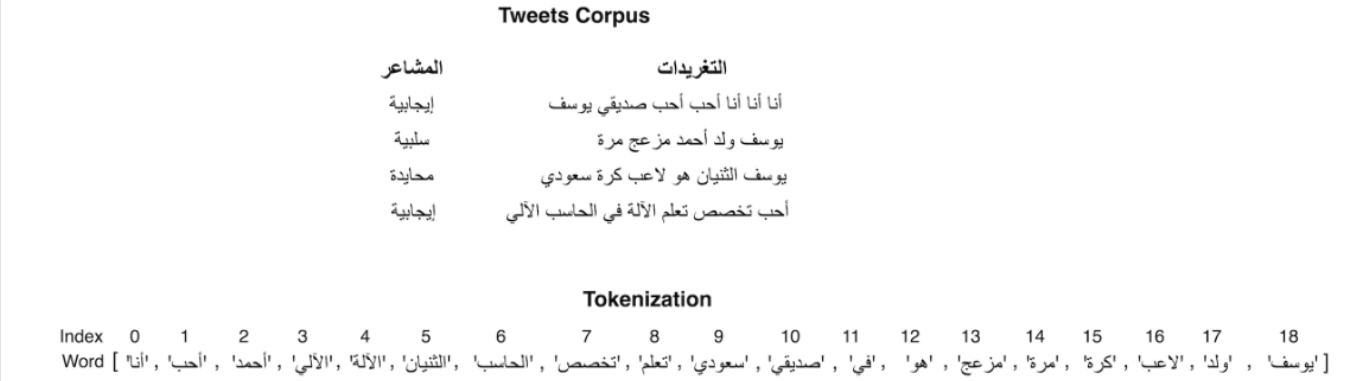

In [49]:
train_data.head()

tweets  \
7231                                       [زيديني, ملح]   
17457                                      [محمد, عمران]   
30831                                        [بعيد, برو]   
18257  [صباح, الخير, أجواء, وادي, فدى, 20, اخدود_الفيض٢]   
9863   مجموعة كلين اخسر كيلو في يوم مع الاخصائيه سها ...   

                                          processed_text  \
7231                                          زيديني ملح   
17457                                         محمد عمران   
30831                                           بعيد برو   
18257                   الخير أجواء وادي فدى اخدود الفيض   
9863   مجموعة كلين اخسر كيلو يوم الاخصائيه سها السعدي...   

                                          root_extracted  Label  
7231                                          زيديني ملح      0  
17457                                           محمد عمر      1  
30831                                           بعيد برو      1  
18257                     خير اجواء وادي فدي اخدود الفيض      1  
9863   مجموعة كلين اخسر كيلو يوم الاخصائيه سها السعدي...      0

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>|Using TfidfTransformer</b></p>
</div>

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True, max_df=0.5, stop_words=None, use_idf=True)
train_data_features = vectorizer.fit_transform(train_data['processed_text'].values.astype('U'))
val_data_features = vectorizer.transform(val_data['processed_text'].values.astype('U'))
test_data_features = vectorizer.transform(test_data['processed_text'].values.astype('U'))

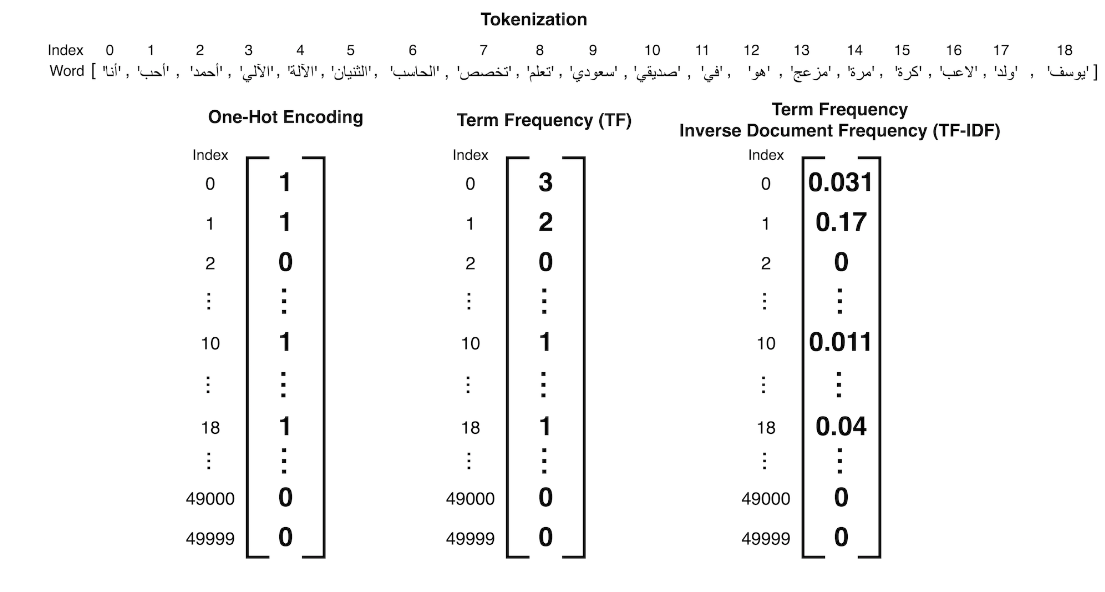

In [51]:
train_data_features.shape, val_data_features.shape, test_data_features.shape

((45436, 252193), (5679, 252193), (5680, 252193))

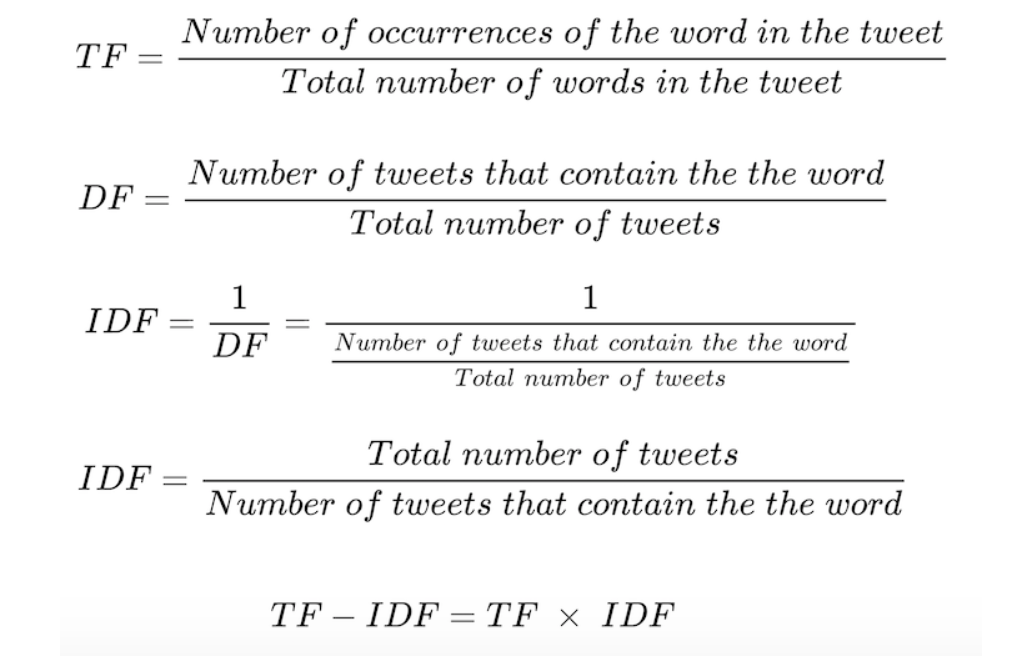

<a name="p7"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">  Model Building and run </h1>

In [52]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from prettytable import PrettyTable

# Initialize lists to store the results
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
train_scores = []  # List to store training scores

def train_n_test_classifier(clf, train_features, train_labels, test_features, test_labels, model_name):
    clf.fit(train_features, train_labels)
    model_names.append(model_name)
    print("score on training data:")
    train_score = clf.score(train_features, train_labels)
    train_scores.append(train_score)
    print(train_score)
    print('_'*50)
    print("score on testing data:")
    #*********************************************************
    pred_y = clf.predict(test_features)
    accuracy = accuracy_score(test_labels, pred_y)
    accuracies.append(accuracy)
    f1 = f1_score(test_labels, pred_y, average='macro')
    f1_scores.append(f1)
    precision = precision_score(test_labels, pred_y, average='macro')
    precisions.append(precision)
    recall = recall_score(test_labels, pred_y, average='macro')
    recalls.append(recall)
    #*********************************************************
    print('accuracy_score: ' ,accuracy  )
    print('f1_score: ' , f1)
    print('precision_score: ', precision )
    print('recall_score: ',recall)



<a id='7.1'></a>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1 |Naive Bayes Algorithm</b></p
</div>

In [53]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
train_n_test_classifier(mnb, train_data_features, train_data[output],
                        val_data_features, val_data[output], "Multinomial Naive Bayes")

score on training data:
0.958975261906858
__________________________________________________
score on testing data:
accuracy_score:  0.8006691318894171
f1_score:  0.8006577032999773
precision_score:  0.8008188178600186
recall_score:  0.8007129313171835


<a id='7.2'></a>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2 |LogisticRegression Algorithm</b></p>
</div>

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=rand_seed)
train_n_test_classifier(logistic_reg, train_data_features, train_data[output],
                        val_data_features, val_data[output] , "Logistic Regression")

score on training data:
0.9332027467206621
__________________________________________________
score on testing data:
accuracy_score:  0.8040147913365029
f1_score:  0.8038043303660599
precision_score:  0.8056342455165002
recall_score:  0.8041606285196341


<a id='7.3'></a>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3 |SVC Algorithm</b></p>
</div>

In [55]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=rand_seed)
train_n_test_classifier(svm, train_data_features, train_data[output],
                        val_data_features, val_data[output],"Support Vector Machine (SVM)")

score on training data:
0.976230301963201
__________________________________________________
score on testing data:
accuracy_score:  0.8100017608733932
f1_score:  0.8098862225862008
precision_score:  0.8109951133161388
recall_score:  0.8101148905791016


<a id='7.4'></a>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4 |MLPClassifier</b></p>
</div>

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20), verbose=True, tol=0.001, random_state=rand_seed)
train_n_test_classifier(mlp, train_data_features, train_data[output],
                        val_data_features, val_data[output],"Multi-layer Perceptron (MLP)")

Iteration 1, loss = 0.53336517
Iteration 2, loss = 0.13855145
Iteration 3, loss = 0.05328989
Iteration 4, loss = 0.04354598
Iteration 5, loss = 0.03947466
Iteration 6, loss = 0.03693672
Iteration 7, loss = 0.03496777
Iteration 8, loss = 0.03417068
Iteration 9, loss = 0.03349289
Iteration 10, loss = 0.03294877
Iteration 11, loss = 0.03305768
Iteration 12, loss = 0.03214004
Iteration 13, loss = 0.03165220
Iteration 14, loss = 0.03123986
Iteration 15, loss = 0.03161232
Iteration 16, loss = 0.03098256
Iteration 17, loss = 0.03053677
Iteration 18, loss = 0.03046821
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
score on training data:
0.9870587199577427
__________________________________________________
score on testing data:
accuracy_score:  0.7906321535481599
f1_score:  0.7905905976748198
precision_score:  0.790752510403238
recall_score:  0.7905880688033728


<a id='7.5'></a>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5 |RandomForestClassifier</b></p>
</div>

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=rand_seed)

train_n_test_classifier(rf, train_data_features, train_data[output],
                        val_data_features, val_data[output],"RandomForestClassifier")

score on training data:
0.9877409983273175
__________________________________________________
score on testing data:
accuracy_score:  0.8019017432646592
f1_score:  0.8013096960743917
precision_score:  0.8060545533720012
recall_score:  0.8021359784923725


<a id='7.6'></a>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6 |AdaBoostClassifier</b></p>
</div>

In [58]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100)
train_n_test_classifier(adaboost, train_data_features, train_data[output],
                        val_data_features, val_data[output],"AdaBoostClassifier")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



score on training data:
0.6632406021656836
__________________________________________________
score on testing data:
accuracy_score:  0.6566296883254094
f1_score:  0.6395848364124812
precision_score:  0.6951198940297723
recall_score:  0.6575212201282262


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
train_n_test_classifier(gboost, train_data_features, train_data[output],
                        val_data_features, val_data[output],"GradientBoostingClassifier")

score on training data:
0.6702834756580685
__________________________________________________
score on testing data:
accuracy_score:  0.6654340552914245
f1_score:  0.6499336729410257
precision_score:  0.7029315202180436
recall_score:  0.6662972048319729


<a name="p8"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Visualization </h1>

In [60]:
results_table = PrettyTable()
results_table.field_names = ["Model", "Training Score", "Accuracy", "Precision", "Recall", "F1"]

# Add rows to the table with results for each model
for i in range(len(model_names)):
    results_table.add_row([model_names[i], round(train_scores[i], 4), round(accuracies[i], 4), round(precisions[i], 4), round(recalls[i], 4), round(f1_scores[i], 4)])

print(results_table)


+------------------------------+----------------+----------+-----------+--------+--------+
|            Model             | Training Score | Accuracy | Precision | Recall |   F1   |
+------------------------------+----------------+----------+-----------+--------+--------+
|   Multinomial Naive Bayes    |     0.959      |  0.8007  |   0.8008  | 0.8007 | 0.8007 |
|     Logistic Regression      |     0.9332     |  0.804   |   0.8056  | 0.8042 | 0.8038 |
| Support Vector Machine (SVM) |     0.9762     |   0.81   |   0.811   | 0.8101 | 0.8099 |
| Multi-layer Perceptron (MLP) |     0.9871     |  0.7906  |   0.7908  | 0.7906 | 0.7906 |
|    RandomForestClassifier    |     0.9877     |  0.8019  |   0.8061  | 0.8021 | 0.8013 |
|      AdaBoostClassifier      |     0.6632     |  0.6566  |   0.6951  | 0.6575 | 0.6396 |
|  GradientBoostingClassifier  |     0.6703     |  0.6654  |   0.7029  | 0.6663 | 0.6499 |
+------------------------------+----------------+----------+-----------+--------+--------+

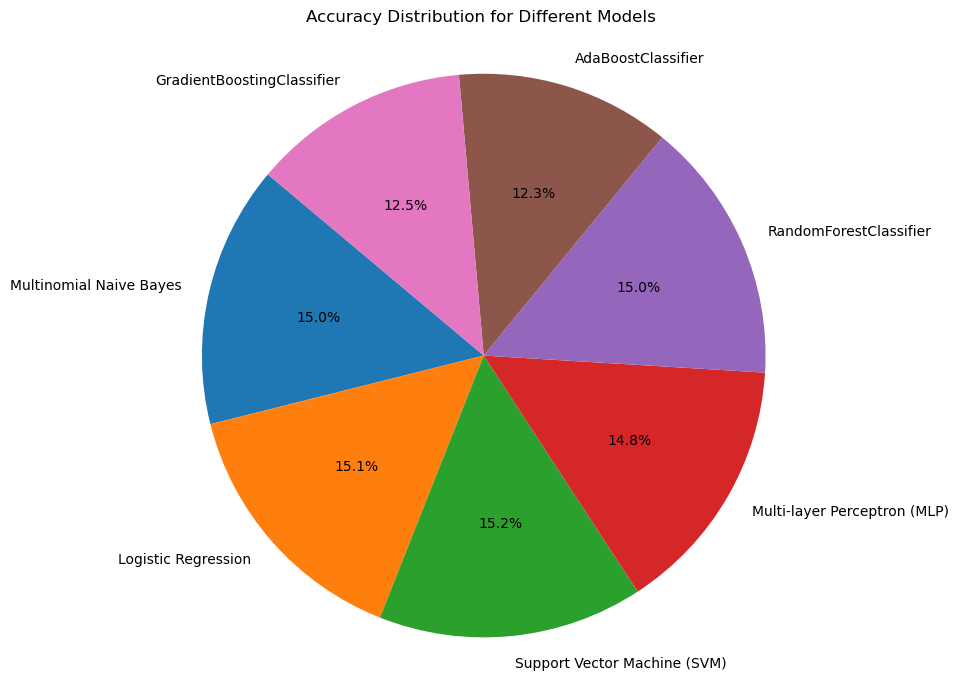

In [61]:
import matplotlib.pyplot as plt

# Define the models and their corresponding accuracy scores
models = model_names
accuracy_scores = accuracies
# Plotting the accuracy scores as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracy_scores, labels=models, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Accuracy Distribution for Different Models \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



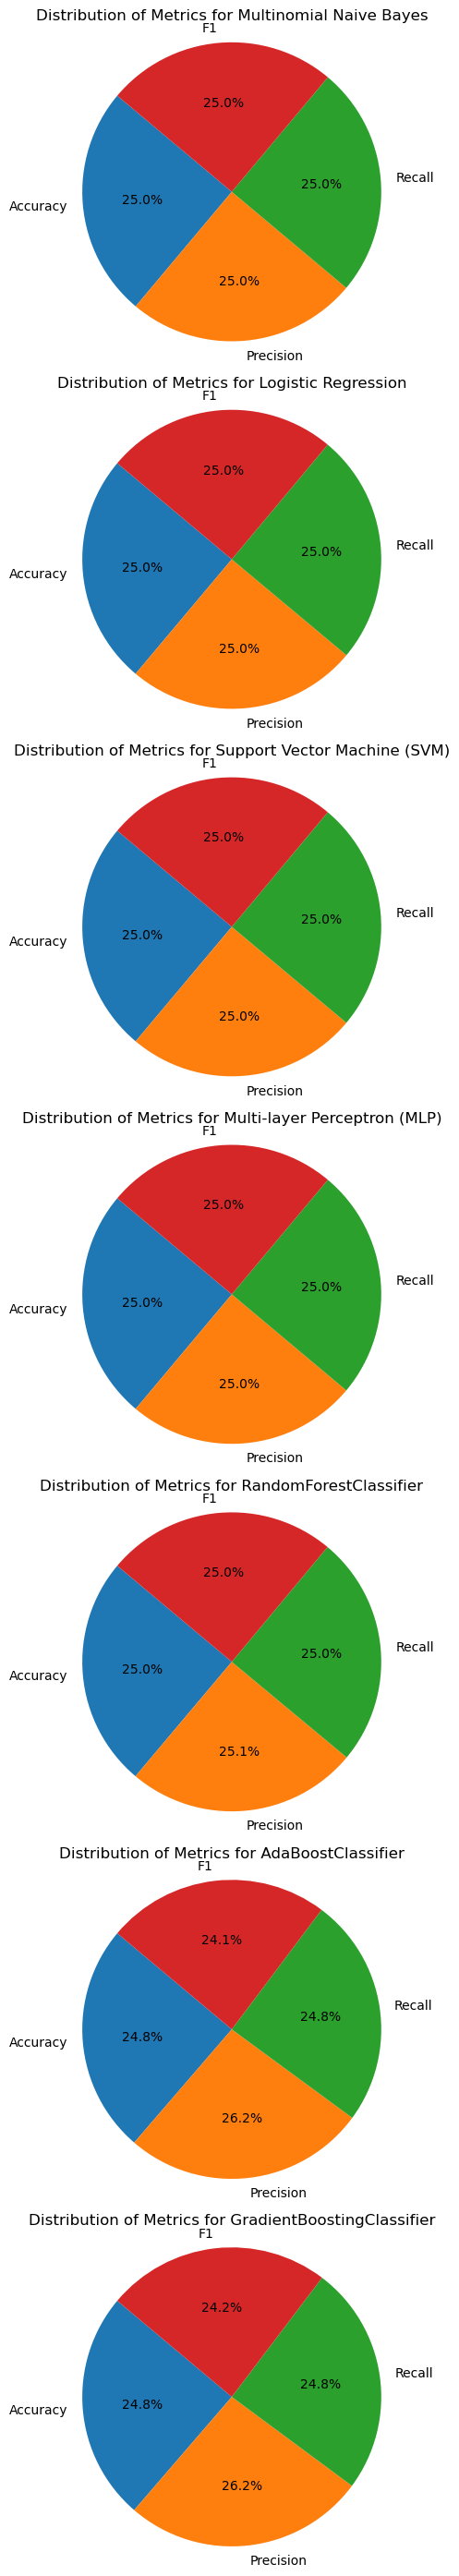

In [62]:
# Define colors for the pie charts
colors = plt.cm.tab10.colors

# Plotting pie charts for each model
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(5, 4 * len(models)))
for i, model in enumerate(models):
    ax = axes[i]
    ax.pie([accuracies[i], precisions[i], recalls[i], f1_scores[i]], labels=['Accuracy', 'Precision', 'Recall', 'F1'],
           autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'Distribution of Metrics for {model}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


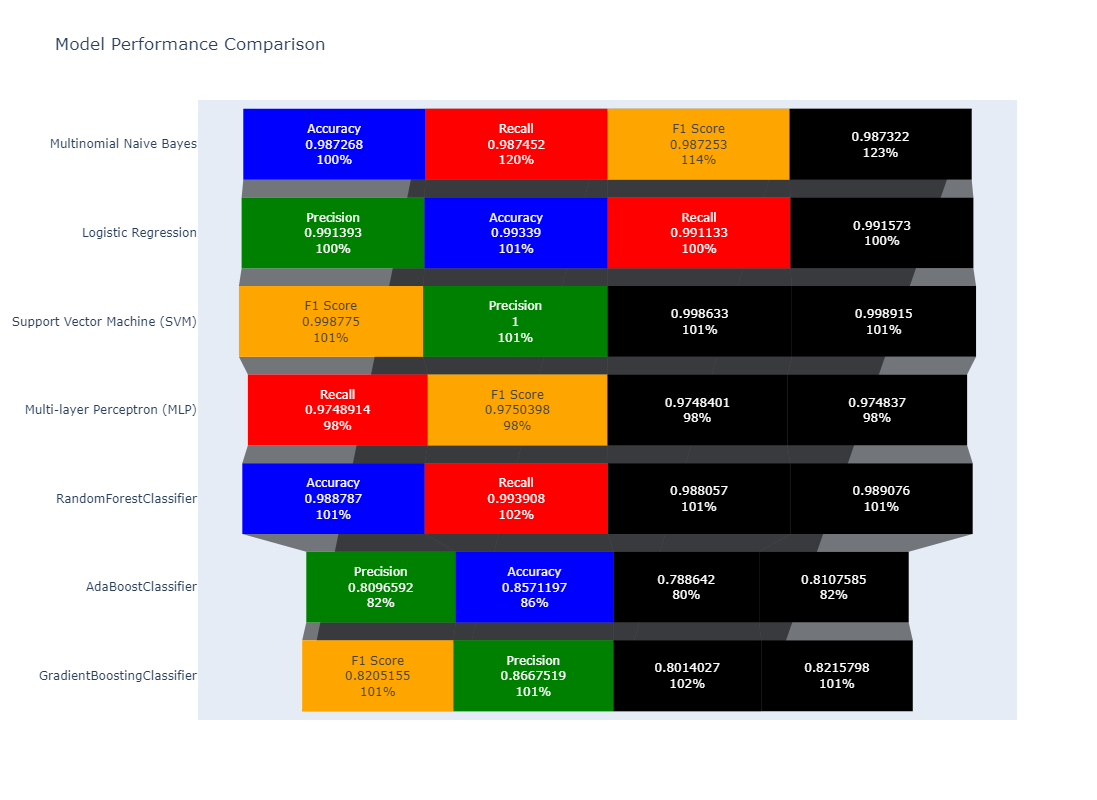

In [63]:
import plotly.graph_objects as go

# Calculate the highest score among the models
highest_score = max(max(accuracies), max(precisions), max(f1_scores), max(recalls))

# Define the text labels for the funnel
labels = ['Accuracy', 'Precision', 'F1 Score', 'Recall']

# Define the values for the funnel (normalized to the highest score)
values = [accuracy / highest_score for accuracy in accuracies]
values += [precision / highest_score for precision in precisions]
values += [f1 / highest_score for f1 in f1_scores]
values += [recall / highest_score for recall in recalls]

# Define colors for each section of the funnel
colors = ['blue', 'green', 'orange', 'red'] * 4

# Concatenate model names for each metric
model_labels = [model for _ in range(4) for model in models]

fig = go.Figure(go.Funnel(
    y=model_labels,  # Use concatenated model names
    x=values,
    text=labels * 4,  # Repeat labels for each model
    textposition="inside",
    textinfo="text+value+percent previous",
    marker=dict(color=colors)
))

fig.update_layout(
    title='Model Performance Comparison',
    funnelmode="stack",
    hovermode='closest',
    height=800  # Set the height of the plot
)

fig.show()


<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b> |Save the model</b></p>
</div>

In [64]:
import pickle
model_directory = 'C:/Users/User/Desktop/data/model'

# Check if the directory exists, if not, create it
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Change the current working directory to the model directory
os.chdir(model_directory)

# Save the models and vectorizer
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(logistic_reg, open('logistic_reg.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))
pickle.dump(svm, open('svm.pkl', 'wb'))
pickle.dump(rf, open('rf.pkl', 'wb'))
pickle.dump(mlp, open('mlp.pkl', 'wb'))


<a name="p9"></a><h1 style="background-color:orange;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Flask App To Serve Our Models </h1>

In [54]:
import pickle
model_directory = 'C:/Users/User/Desktop/data/model'

vectorizer = pickle.load(open(f'{model_directory}/vectorizer.pkl', 'rb'))
logistic_reg = pickle.load(open(f'{model_directory}/logistic_reg.pkl', 'rb'))
svm = pickle.load(open(f'{model_directory}/svm.pkl', 'rb'))

In [ ]:
def predict_multi_level(X, vectorizer, clf):
    y_pred = clf.predict(vectorizer.transform(X))
    return y_pred

X = test_data.dropna()['processed_text'].values
y = test_data.dropna()['Label'].values
pred_y = predict_multi_level(X, vectorizer, svm)

print('accuracy_score: ')
print(accuracy_score(y, pred_y))

print('f1_score: ')
print(f1_score(y, pred_y, average='macro'))


accuracy_score: 
0.793661971830986
f1_score: 
0.7935667354967744


In [ ]:
import csv
import preprocessing as preprocessing
from flask import Flask, flash, request, redirect, url_for
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

# Function to handle saving data to CSV
def save_to_csv(text, prediction, classification):
    with open('user_responses.csv', 'a', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['UserInput', 'ModelPrediction', 'UserClassification'])
        if csvfile.tell() == 0:
            writer.writeheader()
        writer.writerow({'UserInput': text, 'ModelPrediction': prediction, 'UserClassification': classification})

# Function to handle clearing displayed results
def clear_results():
    # You can implement the logic here to clear the displayed results
    pass

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        if 'input_text' not in request.form:
            flash('No text found!')
            return redirect(request.url)

        text = request.form['input_text']
        text = preprocessing.preprocess_arabic_text(text)
        if text == '':
            return 'Please, write an Arabic sentence. Symbols and non-Arabic characters will be removed from the text....'
        
        # Predict sentiment and get user classification
        predcited_sentiment = predict_multi_level(np.array([text]), vectorizer, svm)
        user_classification = request.form.get('confirmation', 'no answer')
        
        # Convert prediction to text format
        predcited_sentiment_text = 'Positive' if predcited_sentiment[0] == 1 else 'Negative'

        # Check which button is clicked
        if 'save_btn' in request.form:
            # Save data to CSV
            save_to_csv(text, predcited_sentiment_text, user_classification)
            return 'Data saved successfully!'
        elif 'clear_btn' in request.form:
            # Clear displayed results
            clear_results()
            return redirect(url_for('upload_file'))  # Redirect to the same route to clear the input

        # Return the sentiment prediction as text
        return predcited_sentiment_text
    
    return '''
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Sentiment Analysis</title>
    <link
      href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap"
      rel="stylesheet"
    />
    <link
      rel="shortcut icon"
      type="image/x-icon"
      href="/static/project_title.ico "
    />
    <style>
    body {
            font-family: "Roboto", sans-serif;
            margin: 0;
            padding: 0;
           background-image: url('/static/Sentiment.jpg');
            background-size: cover;
            background-position: center;
        }

        header {
    background-color: rgba(2, 12, 23, 0.5); 
    color: #fff;
    padding: 20px 0;
    text-align: center;
}

      .container {
        max-width: 600px;
        margin: 20px auto;
        padding: 20px;
        background-color: #f0e3e3;
        border-radius: 8px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
      }
      h1,
      h2 {
        margin-top: 0;
        text-align: center;
      }
      form {
        margin-bottom: 20px;
      }
      textarea {
        width: 100%;
        height: 100px;
        margin-bottom: 10px;
        padding: 10px;
        border: 1px solid #ccc;
        border-radius: 4px;
        resize: vertical;
      }
      input[type="submit"] {
        background-color: #007bff;
        color: #fff;
        border: none;
        padding: 10px 20px;
        cursor: pointer;
        border-radius: 4px;
      }
      .prediction,
      .user-input {
        text-align: center;
        margin-top: 20px;
      }
      .prediction h1,
      .user-input h1 {
        font-size: 24px;
        margin-bottom: 10px;
      }
      .user-input span {
        font-size: 30px;
      }
      .emoji {
        font-size: 48px;
      }
    </style>
  </head>
  <body>
    <header>
      <h1>Sentence Analysis App</h1>
    </header>


<div class="container">
<h1>Sentiment analysis of tweets</h1>
<form method=post enctype=multipart/form-data>
  <textarea id="input_text" class='formVal' rows="5" cols="50" type="text" name="input_text" placeholder=" ادخل التغريدة"></textarea> <br>
  <textarea id="output_text" class='formVal' rows="5" cols="50" type="text" name="output_text" placeholder="المشاعر المتوقعة"></textarea><br>
  

 <br />
        <label for="radio"
          ><b>Do you consider your sentence as Positive or Negative?</b></label>
        <br />
        <input
          type="radio"
          name="confirmation"
          class="confirmation"
          value="Positive"
          required
        />
        Positive
        <br />
        <input
          type="radio"
          name="confirmation"
          class="confirmation"
          value="Negative"
          required
        />
        Negative
        <br />
        <input
  type="radio"
  name="confirmation"
  class="confirmation"
  value="no answer"
/>
I don't want to answer
        <br />
        <br />

<input type="submit" value="submit_now" onclick="myFunction(); return false;">
<input type="submit" name="clear_btn" value="Clear Input">
<input type="submit" name="save_btn" value="Send feedback ">

</form>
<script>


function myFunction()
{
    var output_text_box = document.getElementById('output_text');
    output_text_box.innerHTML = '';
   
    var elements = document.getElementsByClassName("formVal");
    var formData = new FormData(); 
    
    for(var i=0; i<elements.length; i++)
    {
        formData.append(elements[i].name, elements[i].value);
    }
    var xmlHttp = new XMLHttpRequest();
        xmlHttp.onreadystatechange = function()
        {
            if(xmlHttp.readyState == 4 && xmlHttp.status == 200)
            {
                var response = xmlHttp.responseText;
                output_text_box = document.getElementById('output_text');
                console.log(response);
                output_text_box.innerHTML = response;
            }
        }
        xmlHttp.open("post", "/"); 
        xmlHttp.send(formData); 
}
</script>
</body>
</html>

'''
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [26/Apr/2024 20:11:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2024 20:11:56] "GET /static/Sentiment.jpg HTTP/1.1" 200 -


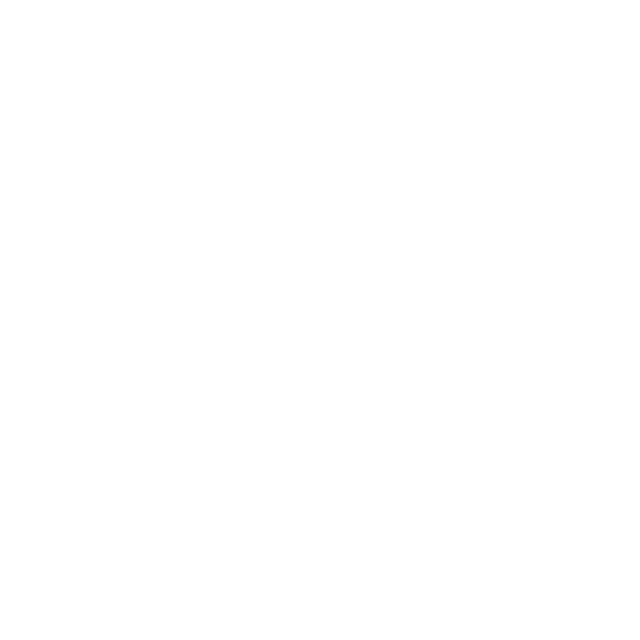

In [ ]:
import requests

In [ ]:
sampled_test_set_api = test_data.head(10).reset_index(drop=True)
sampled_test_set_api.head(10)

In [ ]:
api_link = 'https://twitter.com/ajmaltweets?lang=ar'

In [ ]:
for i in range(len(sampled_test_set_api)):
  tweet = sampled_test_set_api.iloc[i]['tweets']
  sentiment = sampled_test_set_api.iloc[i]['Label']
  api_response = requests.post(url=api_link, data={'input_text': tweet})
  predicted_sentiment = api_response.text
  print('Tweet:', tweet)
  print('Real Sentiment:', sentiment)
  print('Predicted Sentiment:', predicted_sentiment)
  print('-'*85)

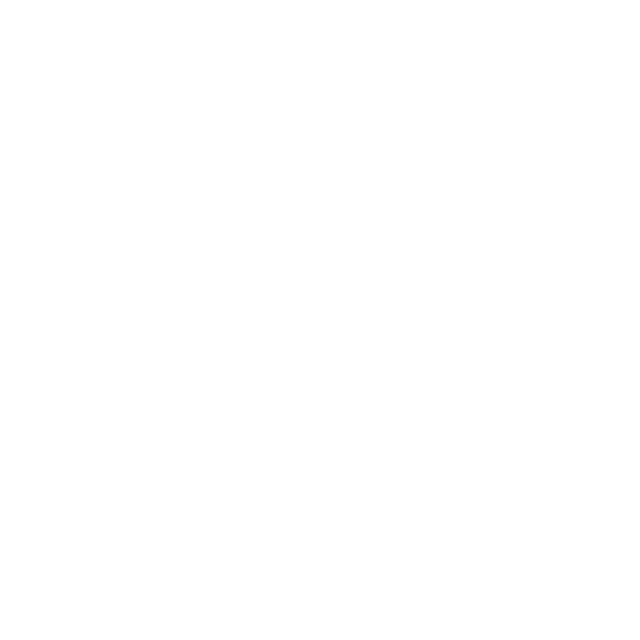